In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('df2_encoded.csv')
df = pd.DataFrame(file)
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,0,0,1,0,0,1,1,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,0,0,1,0,1,1,1,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0,35.0,1,0,1,0,1,1,1,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0,35.0,1,0,1,0,1,1,1,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,1,32.0,0,0,0,1,0,1,1,3.0,4.1,8.0,7.1,3.7


# 1.only with Traning date, no Scaling

Confusion Matrix:
[[290 156]
 [196 261]]


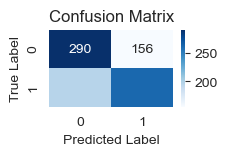

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       446
           1       0.63      0.57      0.60       457

    accuracy                           0.61       903
   macro avg       0.61      0.61      0.61       903
weighted avg       0.61      0.61      0.61       903

Accuracy on Training Data: 0.6101882613510521
Accuracy on Test Data: 0.5132743362831859


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

#  'event' is the target variable that we want to predict
target = df['event']

# Drop the target variable from the features
features = df.drop('event', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)



# Initialize the mlp classifier
mlp1 = MLPClassifier(hidden_layer_sizes=(15, ), random_state=42, max_iter=1000)

# Fit the model on the training data
mlp1.fit(X_train, y_train)


# Make predictions on the training data
train_predictions = mlp1.predict(X_train)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, train_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Get the classification report for the training data
class_report_train = classification_report(y_train, train_predictions)
print("Classification Report for Training Data:")
print(class_report_train)

# to see the accuracy score for the training data
accuracy_score_train = mlp1.score(X_train, y_train)
print(f"Accuracy on Training Data: {accuracy_score_train}")

# Make predictions on the test data
accuracy_score_test = mlp1.score(X_test, y_test)
print(f"Accuracy on Test Data: {accuracy_score_test}")


# 2.only with Traning date, with Standard Scaling

In [4]:
scalerS = StandardScaler()
X_train2 = scalerS.fit_transform(X_train)
X_test2 = scalerS.transform(X_test)
# Initialize the mlp classifier
mlp2 = MLPClassifier(hidden_layer_sizes=(15, ), random_state=42, max_iter=10000)

# Fit the model on the training data
mlp2.fit(X_train2, y_train)


# Make predictions on the training data
train_predictions2 = mlp2.predict(X_train2)

# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(y_train, train_predictions2)

# Print the confusion matrix
print("Confusion Matrix2:")
print(conf_matrix2)


# Get the classification report for the training data
class_report_train2 = classification_report(y_train, train_predictions2)
print("Classification Report for Training Data:")
print(class_report_train2)

# If you want to see the accuracy score for the training data
accuracy_score_train2 = mlp2.score(X_train2, y_train)
print(f"Accuracy on Training Data: {accuracy_score_train2}")

# Make predictions on the test data
accuracy_score_test2 = mlp2.score(X_test2, y_test)
print(f"Accuracy on Test Data: {accuracy_score_test2}")

Confusion Matrix2:
[[340 106]
 [108 349]]
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       446
           1       0.77      0.76      0.77       457

    accuracy                           0.76       903
   macro avg       0.76      0.76      0.76       903
weighted avg       0.76      0.76      0.76       903

Accuracy on Training Data: 0.7630121816168328
Accuracy on Test Data: 0.6061946902654868


# 3.only with Traning date, with MinMax Scaling

In [5]:
scalerM = MinMaxScaler()
X_train3 = scalerM.fit_transform(X_train)
X_test3 = scalerM.transform(X_test)
# Initialize the mlp classifier
mlp3 = MLPClassifier(hidden_layer_sizes=(15, ), random_state=42, max_iter=1000)

# Fit the model on the training data
mlp3.fit(X_train3, y_train)


# Make predictions on the training data
train_predictions3 = mlp3.predict(X_train3)

# Calculate the confusion matrix
conf_matrix3 = confusion_matrix(y_train, train_predictions3)

# Print the confusion matrix
print("Confusion Matrix3:")
print(conf_matrix3)


# Get the classification report for the training data
class_report_train3 = classification_report(y_train, train_predictions3)
print("Classification Report for Training Data:")
print(class_report_train3)

# see the accuracy score for the training data
accuracy_score_train3 = mlp3.score(X_train3, y_train)
print(f"Accuracy on Training Data: {accuracy_score_train3}")

# see the accuracy score for the test data
accuracy_score_test3 = mlp3.score(X_test3, y_test)
print(f"Accuracy on Test Data: {accuracy_score_test3}")

Confusion Matrix3:
[[297 149]
 [129 328]]
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       446
           1       0.69      0.72      0.70       457

    accuracy                           0.69       903
   macro avg       0.69      0.69      0.69       903
weighted avg       0.69      0.69      0.69       903

Accuracy on Training Data: 0.6921373200442967
Accuracy on Test Data: 0.584070796460177


# Fazit:Standard Scaling>MinMax Scaling>no Scaling

# here start with Cross_Val_Score (8 folder is best) with Standard Scaling

In [14]:
from sklearn.model_selection import cross_val_score

mlp4 = MLPClassifier(hidden_layer_sizes=(15, ), random_state=42, max_iter=10000)

for i in range(2, 11):
    scores = cross_val_score(mlp4, X_train2, y_train, cv=i, scoring='accuracy') # with Standard Scaling
    mean_score = scores.mean()
    std_dev = scores.std()
    print(f"Mean accuracy for {i} folds: {mean_score:.3f}")
    print(f"Standard deviation for {i} folds: {std_dev:.3f}")
    print('*'*50)


Mean accuracy for 2 folds: 0.555
Standard deviation for 2 folds: 0.002
**************************************************
Mean accuracy for 3 folds: 0.525
Standard deviation for 3 folds: 0.026
**************************************************
Mean accuracy for 4 folds: 0.550
Standard deviation for 4 folds: 0.034
**************************************************
Mean accuracy for 5 folds: 0.543
Standard deviation for 5 folds: 0.025
**************************************************
Mean accuracy for 6 folds: 0.557
Standard deviation for 6 folds: 0.032
**************************************************
Mean accuracy for 7 folds: 0.576
Standard deviation for 7 folds: 0.045
**************************************************
Mean accuracy for 8 folds: 0.568
Standard deviation for 8 folds: 0.040
**************************************************
Mean accuracy for 9 folds: 0.543
Standard deviation for 9 folds: 0.021
**************************************************
Mean accuracy for 10 fol

# Here start with GridSearchCV with Standard Scaling

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(15,), (30,), (15, 15),(30,30)],  # Different combinations of hidden layers
    'activation': ['tanh', 'relu'],  # Different activation functions
    'solver': ['adam', 'sgd'],  # Different optimization algorithms
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedule
    
}

# Initialize the mlp classifier
mlp5 = MLPClassifier(max_iter=10000, learning_rate_init=0.01, random_state=42 ,tol=1e-3, early_stopping=True )

# Initialize GridSearchCV with the classifier, parameter grid, and number of folds for cross-validation
grid_search = GridSearchCV(estimator=mlp5, param_grid=param_grid, cv=7, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# The best model is also available
best_mlp = grid_search.best_estimator_

X_test2 = scalerS.transform(X_test) #Standard Scaling

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.5968992248062016


In [21]:
X_test2 = scalerS.fit_transform(X_test) #Standard Scaling

# Make predictions on the test data
predictions_best = best_mlp.predict(X_test2)

# Calculate the confusion matrix
conf_matrix_best = confusion_matrix(y_test, predictions_best)
print("Confusion Matrix_best:")
print(conf_matrix_best)

# Get the classification report for the test data
class_report_best = classification_report(y_test, predictions_best)
print("Classification Report for Test Data:")
print(class_report_best)

# to see the accuracy score for the test data
accuracy_score_best = best_mlp.score(X_test2, y_test)
print(f"Accuracy on Test Data: {accuracy_score_best}")



Confusion Matrix_best:
[[69 43]
 [58 56]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       112
           1       0.57      0.49      0.53       114

    accuracy                           0.55       226
   macro avg       0.55      0.55      0.55       226
weighted avg       0.55      0.55      0.55       226

Accuracy on Test Data: 0.5530973451327433
